In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


# matplotlib 한글 폰트 문제 해결
import matplotlib.pyplot as plt
from matplotlib import rc
import platform 

if platform.system() == 'Darwin':   # Mac 환경 폰트 지정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)

In [4]:
import pandas as pd
import seaborn as sns

In [8]:
titanic = sns.load_dataset('titanic')
titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


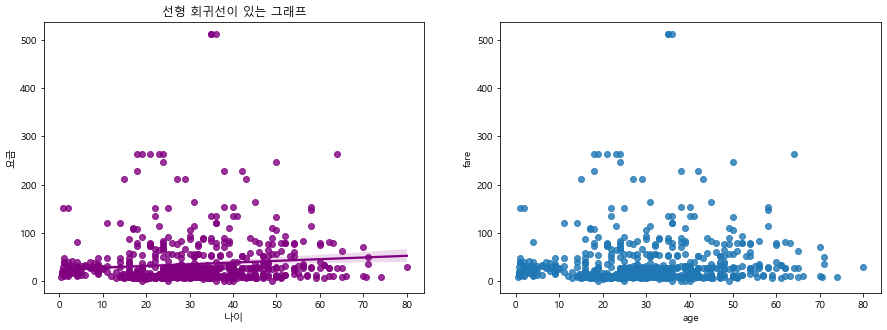

In [63]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age',
           y='fare',
            data=titanic,
           ax=ax1,
           color='purple',)
sns.regplot(x='age',
           y='fare',
            data=titanic,
            ax=ax2,
            fit_reg=False)
ax1.set_title('선형 회귀선이 있는 그래프')
ax1.set_xlabel('나이')
ax1.set_ylabel('요금')
plt.show()


C:\Users\HPE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


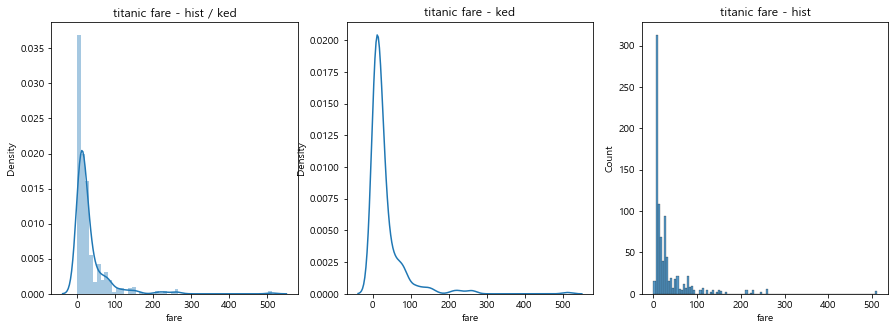

In [64]:
#히스토그램 / 커널 밀도 함수
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot
sns.distplot(titanic['fare'],ax=ax1)

#kdeplot
sns.kdeplot(x='fare',data=titanic, ax=ax2)

#histplot
sns.histplot(x='fare',data=titanic, ax=ax3)

ax1.set_title('titanic fare - hist / ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

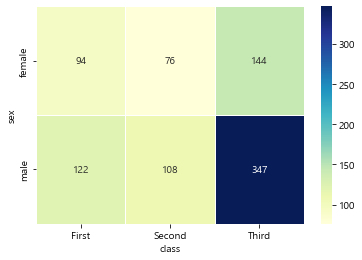

In [72]:
# 히트맵

table = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')

sns.heatmap(table,                 #데이터 프레임
           annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
           cmap='YlGnBu',          #컬러 맵
           linewidth=.5,           #구분 선
           cbar=True)             #컬러 바 표시 여부

plt.show()

In [68]:
titanic['class'].unique()
titanic.sex.unique()

array(['male', 'female'], dtype=object)

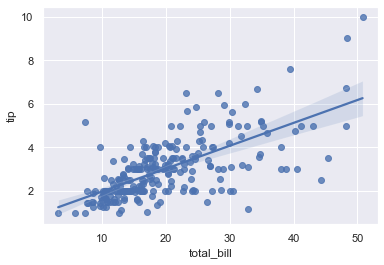

In [79]:
import seaborn as sns

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips)

plt.show()

In [77]:
print(sns.__version__)

0.11.2


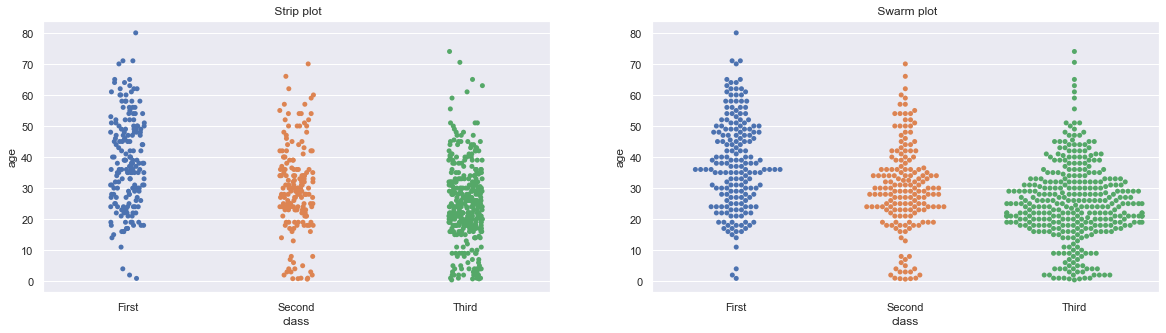

In [87]:
# 범주형 데이터 산점도

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포, 데이터 분산 미고려 (중복 표시 함)

sns.stripplot(x='class',
             y='age',
             data=titanic,
             ax=ax1)

sns.swarmplot(x='class',
             y='age',
             data=titanic,
              size=5,
             ax=ax2)

ax1.set_title(' Strip plot')
ax2.set_title(' Swarm plot')

plt.show()

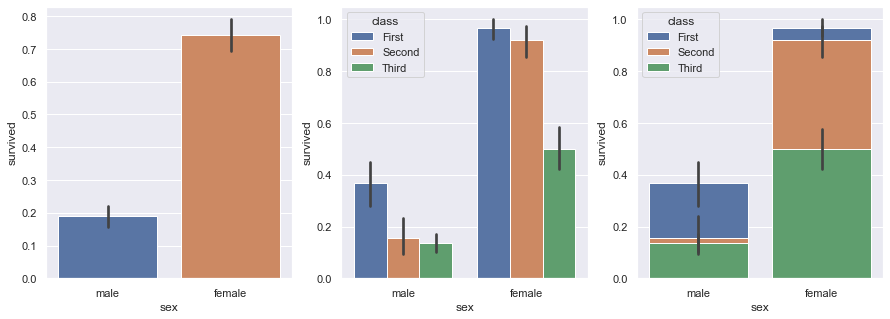

In [92]:
# 막대 그래프 : barplot()

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot (x='sex',y='survived',data=titanic, ax=ax1)

sns.barplot (x='sex',y='survived',hue='class',data=titanic, ax=ax2)

sns.barplot (x='sex',y='survived',hue='class',data=titanic, ax=ax3,
             dodge=False)
plt.show()

In [90]:
titanic.sex.unique()

array(['male', 'female'], dtype=object)

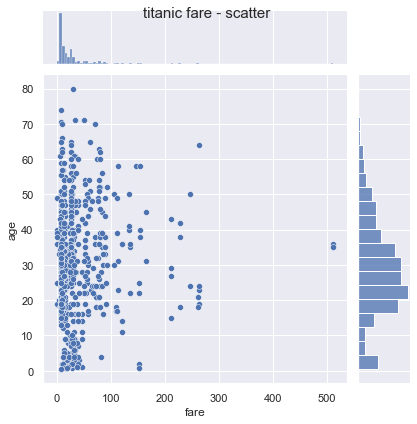

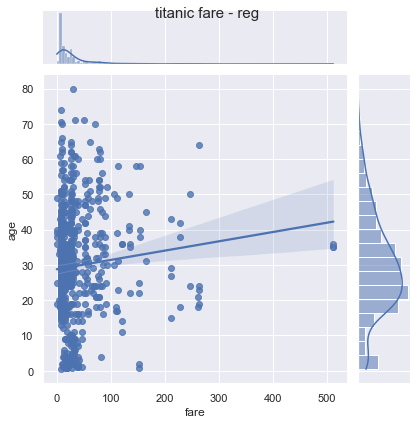

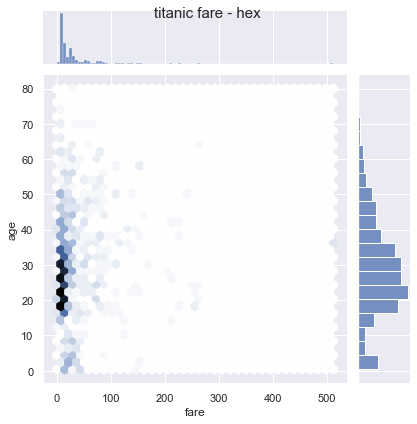

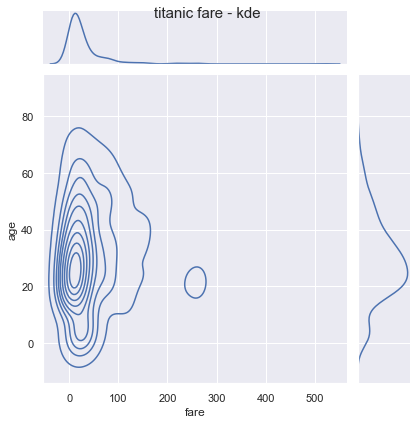

In [96]:
# 조인트 그래프 : jointplot() -> 산점도를 기본, x-y축에 변수에 대한 히스토그램

titanic = sns.load_dataset('titanic')

# 조인트 기본
j1 = sns.jointplot(x='fare',y='age',data=titanic)
# 회귀선이 있는 조인트
j2 = sns.jointplot(x='fare',y='age',data=titanic, kind='reg')
# 조인트 육각형 그래프 
j3 = sns.jointplot(x='fare',y='age',data=titanic, kind='hex')
# 조인트 커널 밀집그래프 
j4 = sns.jointplot(x='fare',y='age',data=titanic, kind='kde')


j1.fig.suptitle('titanic fare - scatter',size=15)
j2.fig.suptitle('titanic fare - reg',size=15)
j3.fig.suptitle('titanic fare - hex',size=15)
j4.fig.suptitle('titanic fare - kde',size=15)

plt.show()